<a href="https://colab.research.google.com/github/fatimahalshehri1/Differntial-Privacy/blob/main/test_Laplace_Noise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/All/dataset/block_4.csv')
data


,LCLid,tstp,energy(kWh/hh)
0,MAC000517,2012-03-27 11:30:00.0000000,0.305
1,MAC000517,2012-03-27 12:00:00.0000000,0.118
2,MAC000517,2012-03-27 12:30:00.0000000,0.214
3,MAC000517,2012-03-27 13:00:00.0000000,0.097
4,MAC000517,2012-03-27 13:30:00.0000000,0.117
...,...,...,...
1473171,MAC005550,2014-02-27 22:00:00.0000000,0.09
1473172,MAC005550,2014-02-27 22:30:00.0000000,0.103
1473173,MAC005550,2014-02-27 23:00:00.0000000,0.134
1473174,MAC005550,2014-02-27 23:30:00.0000000,0.084


In [ ]:
data.dtypes


LCLid             object
tstp              object
energy(kWh/hh)    object
dtype: object

In [ ]:
data.drop(columns = 'tstp', axis = 1, inplace= True)

In [ ]:
data.drop(columns = 'LCLid', axis = 1, inplace= True)

In [ ]:
data

,energy(kWh/hh)
0,0.305
1,0.118
2,0.214
3,0.097
4,0.117
...,...
1473171,0.09
1473172,0.103
1473173,0.134
1473174,0.084


In [ ]:

data['energy(kWh/hh)'] = data['energy(kWh/hh)'].replace('Null','0')

In [ ]:
data['energy(kWh/hh)']=data['energy(kWh/hh)'].astype(float)



In [ ]:
data.dtypes

energy(kWh/hh)    float64
dtype: object

         energy(kWh/hh)
0                 0.305
1                 0.118
2                 0.214
3                 0.097
4                 0.117
...                 ...
1473171           0.090
1473172           0.103
1473173           0.134
1473174           0.084
1473175           0.057

[1473176 rows x 1 columns]


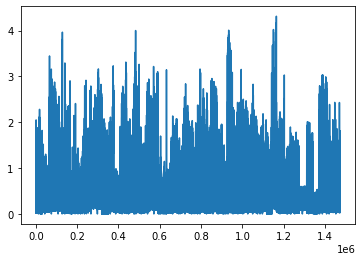

In [ ]:
# Generate noisy histogram
# kind="bar",color = 'g'
data['energy(kWh/hh)'].plot(kind="line")
#data['LCLid'].plot()

print(data)

In [ ]:
# Gets random laplacian noise for all values
Laplacian_noise = np.random.laplace(data)
print(Laplacian_noise)

[[-0.19708221]
 [ 1.13267712]
 [ 1.84459238]
 ...
 [-1.79869845]
 [ 0.5615926 ]
 [-0.11089075]]


In [ ]:


# Add random noise generated from Laplace function to actual count
noisydata = data + Laplacian_noise

In [ ]:
# Set parameters for Laplace function implementation
location = 0
scale = 1
#Find actual data count
datacount = data['energy(kWh/hh)'].value_counts()

         energy(kWh/hh)
0              0.107918
1              1.250677
2              2.058592
3             -2.306421
4              0.004864
...                 ...
1473171       -0.148098
1473172        0.547473
1473173       -1.664698
1473174        0.645593
1473175       -0.053891

[1473176 rows x 1 columns]


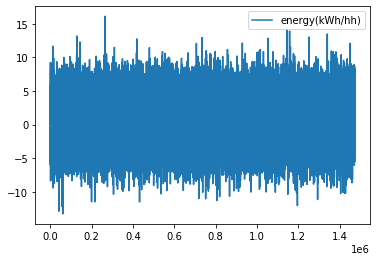

In [ ]:
noisydata.plot(kind="line")
print(noisydata)
#kind="bar",color = 'g'